In [21]:
import csv
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interpolate
import warnings
import random
import math

In [22]:
with open('heartdisease.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('heartdisease.csv', 'w',newline='') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal', 'num'))
        writer.writerows(lines)

warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('heartdisease.csv', header = None)
training_x=df.iloc[1:df.shape[0],0:13]
training_y=df.iloc[1:df.shape[0],13:14]
print(df)

x=np.array(training_x)
y=np.array(training_y)

       0    1    2       3      4    5        6        7      8        9   \
0     age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak   
1    63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
2    67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
3    67.0  1.0  4.0   120.0  229.0  0.0      2.0    129.0    1.0      2.6   
4    37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
..    ...  ...  ...     ...    ...  ...      ...      ...    ...      ...   
299  45.0  1.0  1.0   110.0  264.0  0.0      0.0    132.0    0.0      1.2   
300  68.0  1.0  4.0   144.0  193.0  1.0      0.0    141.0    0.0      3.4   
301  57.0  1.0  4.0   130.0  131.0  0.0      0.0    115.0    1.0      1.2   
302  57.0  0.0  2.0   130.0  236.0  0.0      2.0    174.0    0.0      0.0   
303  38.0  1.0  3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

        10   11    12   13  
0    slope   ca  thal  num  
1      3.0  0.0  




Test Train Split no.  1 





Gaussian Naive Bayes model accuracy(in %): 51.31578947368421




Confusion Matrix
[[31  7  2  0  1]
 [ 3  6  1  2  1]
 [ 0  0  1  2  2]
 [ 1  4  7  1  0]
 [ 0  2  1  1  0]]




F1 Score
0.5299871679973929




ROC Curve


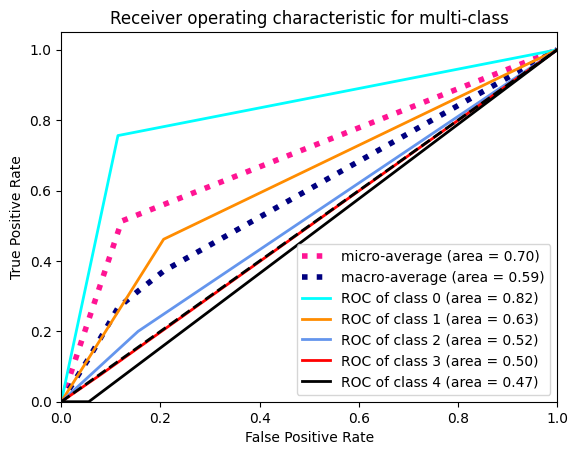




Test Train Split no.  2 





Gaussian Naive Bayes model accuracy(in %): 53.94736842105263




Confusion Matrix
[[32  5  1  0  1]
 [ 8  3  2  3  0]
 [ 1  1  0  5  1]
 [ 0  2  2  6  1]
 [ 0  1  0  1  0]]




F1 Score
0.5224407171775594




ROC Curve


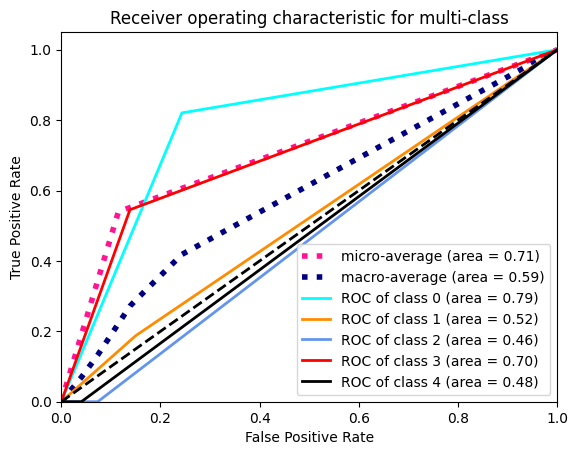




Test Train Split no.  3 





Gaussian Naive Bayes model accuracy(in %): 56.57894736842105




Confusion Matrix
[[34  5  0  0  1]
 [ 4  4  0  2  0]
 [ 0  5  1  4  0]
 [ 0  3  4  4  1]
 [ 0  2  0  2  0]]




F1 Score
0.5653124854576761




ROC Curve


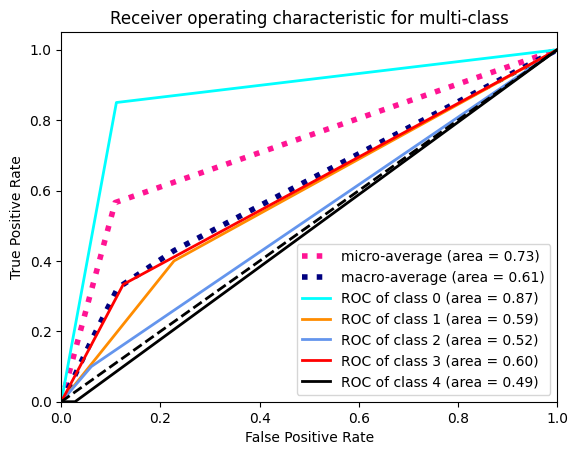




Test Train Split no.  4 





Gaussian Naive Bayes model accuracy(in %): 55.26315789473685




Confusion Matrix
[[37  4  1  0  1]
 [ 6  2  0  0  7]
 [ 0  1  1  0  4]
 [ 0  1  2  0  5]
 [ 0  2  0  0  2]]




F1 Score
0.5433638443935928




ROC Curve


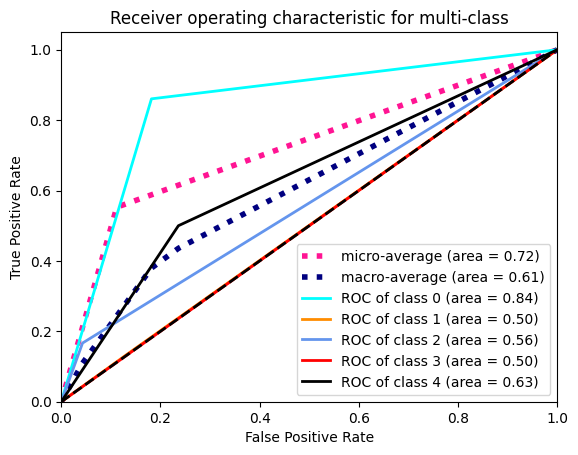




Test Train Split no.  5 





Gaussian Naive Bayes model accuracy(in %): 52.63157894736842




Confusion Matrix
[[38  1  0  0  5]
 [ 1  0  0  1  9]
 [ 0  0  0  1 10]
 [ 1  0  1  0  5]
 [ 0  0  0  1  2]]




F1 Score
0.528453486657821




ROC Curve


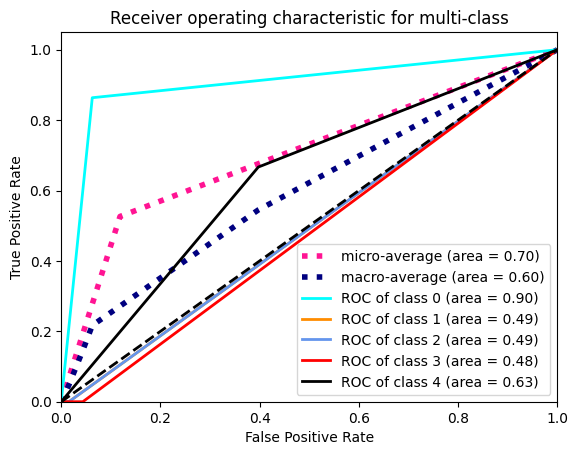

In [20]:
for z in range(5):
    print("\n\n\nTest Train Split no. ",z+1,"\n\n\n")
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=None)
    # Gaussian function of sklearn
    gnb = GaussianNB()
    gnb.fit(x_train, y_train.ravel())
    y_pred = gnb.predict(x_test)
    
    print("\n\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
    
    # convert 2D array to 1D array
    y1=y_test.ravel()
    y_pred1=y_pred.ravel()
    
    print("\n\n\n\nConfusion Matrix")
    cf_matrix=confusion_matrix(y1,y_pred1)
    print(cf_matrix)
    
    print("\n\n\n\nF1 Score")
    f_score=f1_score(y1,y_pred1,average='weighted')
    print(f_score)
    
    # Matrix from 1D array
    y2=np.zeros(shape=(len(y1),5))
    y3=np.zeros(shape=(len(y_pred1),5))
    for i in range(len(y1)):
        y2[i][int(y1[i])]=1
    
    for i in range(len(y_pred1)):
        y3[i][int(y_pred1[i])]=1
     
    
    # ROC Curve generation
    n_classes = 5
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y2[:, i], y3[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y2.ravel(), y3.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area
    print("\n\n\n\nROC Curve")
    # First aggregate all false positive rates
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        f = interpolate.interp1d(fpr[i], tpr[i], bounds_error=False, fill_value='extrapolate')
        # Apply the interpolation function
        mean_tpr += f(all_fpr)
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','black'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class')
    plt.legend(loc="lower right")
    plt.show()